In [1]:
import os
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def read_data(direct: str, file_name: str):
    dfs = []
    for file in os.listdir(direct):
        if file.endswith('.parquet') and file.startswith(file_name):
            dfs.append(pd.read_parquet(os.path.join(direct, file)))
    return pd.concat(dfs, ignore_index=True)


In [3]:

match_event = read_data('raw_match_parquet','event') 
match_away_score = read_data('raw_match_parquet','away_team_score')
match_away = read_data('raw_match_parquet','away_team_1')
match_home_score = read_data('raw_match_parquet','home_team_score')
match_home = read_data('raw_match_parquet','home_team_1')
match_round = read_data('raw_match_parquet','round')
match_season = read_data('raw_match_parquet','season')
match_time = read_data('raw_match_parquet','time')
match_tournament = read_data('raw_match_parquet','tournament')
match_venue = read_data('raw_match_parquet','venue')
odds_info = read_data('raw_odds_parquet','odds')
game_info = read_data('raw_point_by_point_parquet','pbp')
period_info = read_data('raw_statistics_parquet', 'statistics')
power_info = read_data('raw_tennis_power_parquet','power')
match_votes = read_data('raw_votes_parquet','votes')

C:\Users\Mhmd\AppData\Local\Temp\ipykernel_4444\3654884657.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)
C:\Users\Mhmd\AppData\Local\Temp\ipykernel_4444\3654884657.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)


### 1-How many tennis players are included in the dataset?


In [4]:
pd.concat([match_home, match_away]).name.nunique()

596

There are 596 tennis players are  participated in these tournaments


### 9-Which player has won the most tournaments in a single month?

In [6]:
match_away_1 = pd.merge(match_event, match_round, on='match_id')

match_event['start_datetime'] = pd.to_datetime(match_event['start_datetime'], unit='s')
match_event['month'] = match_event['start_datetime'].dt.month
df_2 = pd.DataFrame(match_away_1['match_slug'],match_away_1['winner_code'])
match_away_1['winner'] = np.nan
match_away_1.loc[match_away_1['winner_code'] == 1, 'winner'] = match_away_1.loc[match_away_1['winner_code'] == 1, 'match_slug'].str.split('-').str[0]
match_away_1.loc[match_away_1['winner_code'] == 2, 'winner'] = match_away_1.loc[match_away_1['winner_code'] == 2, 'match_slug'].str.split('-').str[1]
match_away_1.drop(columns=['winner_code'], inplace=False)
df_3 =match_away_1.loc[match_away_1['slug'] == 'final' ]
df_3.groupby(['winner', 'month']).size()
 

C:\Users\Mhmd\AppData\Local\Temp\ipykernel_4444\2032400785.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['heide' 'heide' 'shelbayh' 'draper' 'van' 'kudermetova' 'bublik'
 'mededovic' 'rodionov' 'jarry' 'alcaraz' 'alcaraz' 'davidovich'
 'kalinina' 'brady' 'sabalenka' 'paolini' 'wang' 'fruhvirtova' 'wang'
 'zhu' 'siniakova' 'sonobe' 'biolay' 'sierra' 'grant' 'kessler' 'stearns'
 'kubka' 'privara' 'berberovic' 'pawelski' 'aunion' 'manzanera' 'singh'
 'maksymchuk' 'merida' 'pokorny' 'gulin' 'janicijevic' 'falcao' 'krutykh'
 'thomson' 'weis' 'sonobe' 'hoang' 'debru' 'gobat' 'sabas' 'liutarevich'
 'fery' 'zarazua' 'claverie' 'saraiva' 'kuzuhara' 'roveri' 'bicknell'
 'ono' 'tosetto' 'burnett' 'holmgren' 'moller' 'perez' 'rivera' 'zhu'
 'chidekh' 'lalami' 'hsu' 'zakharov' 'kachmazov' 'uchiyama' 'sun'
 'zhukayev' 'haliak' 'kirkin' 'lock' 'atmane' 'sekulic' 'tung' 'hijikata'
 'pampanin' 'svajda']' has dtype

winner       month
berberovic   10       1
crawford     10       1
draper       10       1
gill         10       1
gjorcheska   10       1
glinka       10       1
grant        10       1
guillen      10       1
heide        10       1
hobgarski    10       1
janicijevic  10       1
kubka        10       1
kudermetova  10       1
ma           10       1
martynov     10       1
privara      10       1
roca         10       1
safwat       10       1
sonobe       10       1
tabur        10       1
vacherot     10       1
zarazua      10       1
dtype: int64

There are 22 tournament winners , it shows that none of the players defended of his trophy

### 13-What is the distribution of left-handed versus right-handed players?

In [24]:
dataset = pd.concat([match_home, match_away]).drop_duplicates('player_id')

right_handed = (dataset['plays']).str.contains('right').sum()
left_handed = (dataset['plays']).str.contains('left').sum()
print(f'The number of right-handed players is:  {right_handed}')
print(f'The number of left-handed players is:  {left_handed} ')

The number of right-handed players is:  244
The number of left-handed players is:  32 


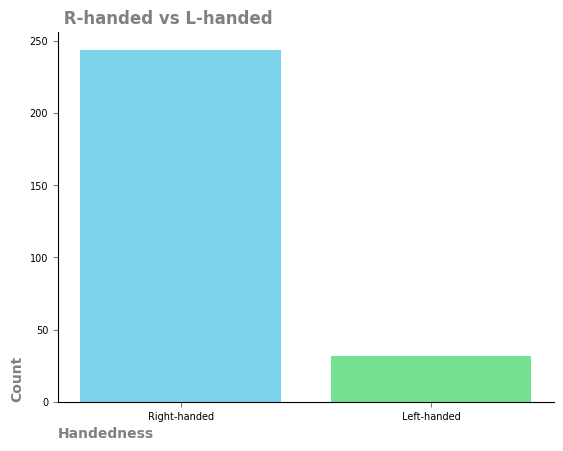

<Figure size 800x600 with 0 Axes>

In [25]:
labels = ['Right-handed', 'Left-handed']
counts = [right_handed, left_handed]

plt.bar(labels, counts, color=['#7BD3EA', '#74E291'])
plt.xlabel('Handedness',loc= "left", color = "gray",fontdict={"weight":"bold"})
plt.ylabel('Count',loc= "bottom", color = "gray",fontdict={"weight":"bold"})
plt.title(' R-handed vs L-handed',loc= "left",color = "gray",fontdict={"weight":"bold"})
plt.gca().tick_params(axis='y', labelsize=7,color = "gray")
plt.gca().tick_params(axis='x', labelsize=7,color = "gray")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.figure(figsize=(8, 6))

plt.show()

There is 244 right-handed an 32 left-handed players in this data which represent that the R-handed 8 times more than the L-handed

### 17-What is the average number of breaks of serve per match?


In [26]:
break_counts = power_info.groupby('match_id')['break_occurred'].sum().reset_index()

avg_breaks = break_counts['break_occurred'].mean()
avg_breaks

7.157303370786517

at this competitions , players asked seven time for break of serve, averagely

### 5-How many sets are typically played in a tennis match?

In [7]:
merge = pd.concat([match_away_score,match_home_score]).drop_duplicates('match_id')
match_away_score.dropna(subset=['period_1', 'period_2', 'period_3', 'period_4', 'period_5'])

match_away_score['total_sets'] = match_away_score[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].count(axis=1)

typical_sets = match_away_score['total_sets'].mean()

print(f"The typical number of sets played in a tennis match is: {typical_sets}")


The typical number of sets played in a tennis match is: 2.181937172774869


The typical number of sets played in a tennis match is: 2


OPTIONAL QUESTIONS

What is the average height of players 


In [31]:
data_1 =pd.concat([match_away, match_home]).drop_duplicates('player_id')
average_height = data_1['height'].mean()
print("Average height of players:", average_height)


Average height of players: 1.8293215339233038


Average height of players is 1.82 which represt that the tennis playres are tall!










How many matches were played in each city

In [32]:
matches_per_city = match_venue['city'].value_counts()
print(matches_per_city)


city
Monastir                    79
Mendoza                     69
Sharm El Sheikh             68
Cairns                      57
Bad Waltersdorf             49
Lisbon                      43
Sibenik                     38
Pazardzhik                  36
Beijing                     36
Santa Margherita Di Pula    34
Reims                       33
Shanghai                    24
Zaragoza                    24
Saint Eloi                  22
Alicante                    21
Baza                        18
Mouilleron-Le-Captif        18
Makinohara                  16
Campinas                    15
Tiburon                     13
Doha                         8
Astana                       7
Lujan                        6
Bogota                       3
Templeton                    3
Albuquerque                  3
Hilton Head                  3
Forbach                      3
Orleans                      3
Charleston                   3
Santarem                     1
Kursumlijska Banja           1
Bra

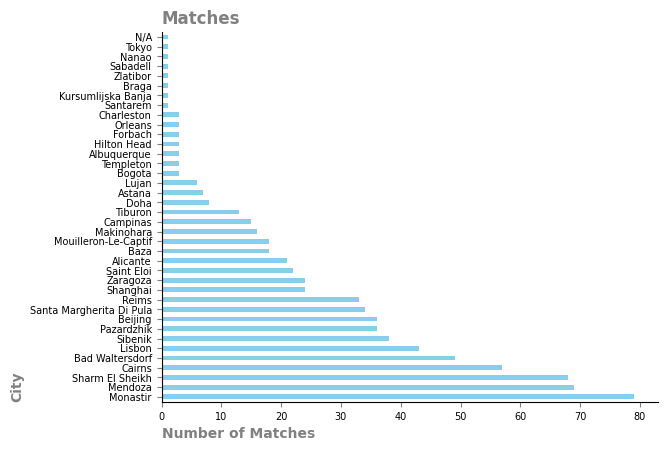

<Figure size 800x600 with 0 Axes>

In [33]:
matches_per_city = match_venue['city'].value_counts()
matches_per_city.plot(kind='barh', color='skyblue')
plt.title('Matches',color = 'gray',loc="left",fontdict={"weight":"bold"})
plt.xlabel('Number of Matches',color = 'gray',loc = "left",fontdict={"weight":"bold"})
plt.ylabel('City',color = 'gray',loc="bottom",fontdict={"weight":"bold"})
plt.gca().tick_params(axis='y', labelsize=7,color = "gray")
plt.gca().tick_params(axis='x', labelsize=7,color = "gray")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.figure(figsize=(8, 6))

plt.show()

Monastir city in tunisia with 79 matches and Mendoza in argentina with 69, have tho most hoset of competions

What are the top 5 players with the highest current rank

In [72]:
away_home = pd.concat([match_away,match_home]).drop_duplicates('player_id')
top_players = away_home[['name', 'current_rank']].sort_values('current_rank').head(5)
print(top_players)


            name current_rank
48    Świątek I.            1
35  Sabalenka A.            2
20    Alcaraz C.            2
45      Gauff C.            3
18   Medvedev D.            3


Świątek is the best player in this tournaments

3. Which player has the highest number of wins?


In [89]:
df_6 = match_event[['match_id','winner_code']].loc[match_event['winner_code'] == 1]
df_7 = match_event[['match_id','winner_code']].loc[match_event['winner_code'] == 2]
home = pd.merge(df_6, match_home).drop_duplicates('match_id')
away = pd.merge(df_7, match_away).drop_duplicates('match_id')
df_8 = pd.concat([home,away])
df_8['name'].value_counts().reset_index(name = 'wins').head(5)

,name,wins
0,Milushev P.,3
1,Kalina V.,3
2,Panaras A.,3
3,Tirante T.,2
4,Mouilleron Salvo M.,2


3 players have most wins with 3 wins in matches